<a href="https://colab.research.google.com/github/sarashahin/Breast_Cancer_Detection_Attention-UNet_Segmentatio/blob/main/Breast_Cancer_Detection_Attention_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'breast-ultrasound-images-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1209633%2F2021025%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240803%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240803T133201Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D85c7eb12203bb19dccbf2303662bf97e4060fbc017ee23d51626c7da597e0883a7fb47e52bc1df25fad067ebbffe483f614c9910dbc28e68c021e65ddd5c55f22de35c42800cf9e759d59d9c0f65d13d9cc5b5da2ae2e631039994fc35522658136f9afaa7a3c6285960ba01040920f8735e22ca8cb6cc4ea75bc9e059144b69316c923d868c0b6ab79818f684af2ff1d003ac14ad40b530f2deb607e052a82410f7c67b7ecd52a0f8ef2edcfed414d71db4cb6b3b6b2b4457e289a1096607a4874178f91b485210ff9562e763bab62da3598a737ccc39b19990949522ff0e7492fad1bfc86dcd5b36ef1144cf4942534a9a9f2d9c36a5136fe828a9ea214ea4,breast-cancer-detection-unet:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2456391%2F4161522%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240803%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240803T133201Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0e11710a2c4e7c1ec3ff62422219a5973f6fb476db60d8dc2a07d2022da71a033e5e2800386e3f912d76751966c56333bd995590c7eedac136cb040f9d0d376def930aca70e4dbfc4740a67b5c6c370c31b0629839cb711d2ef78ec47022cc8eef30e943d4f4ae80fc7788526f66e27f2251e648c2a88ab1dbd47b6ee130295c490870f6aebccbad3283c6a9ccd7cf5893e1571e3e80cc90d754a57618aca2dd424164a657ba84cf58c39eec02f3088d197d96a497f83cde4738bb8a88fa45e0e0328c2635583ebf794f9e2581d23b8172694047090b07ca5c103d648d79492f449869aac53fc5edcf1de9320a70581b0a0b681936d2fa02330605ee969975fc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# **Introduction**

**About Dataset**

**About Dataset**

Breast cancer is a leading cause of death among women worldwide. Early detection significantly reduces death rates.

This dataset includes breast ultrasound images used for early breast cancer diagnosis. The images are classified into three categories: normal, benign, and malignant.

**Key Details**:

Purpose: Early detection of breast cancer through ultrasound images.

Classes: Normal, Benign, Malignant.

Data Collection Year: 2018.

Participants: 600 female patients aged 25-75.

Number of Images: 780.

Image Size: Average of 500x500 pixels.

Format: PNG.

Annotations: Ground truth images are included for comparison.

# **Imports**

In [ ]:
from IPython.display import clear_output
!pip install tf_explain
clear_output()

In [ ]:
# common
import os
import keras
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi

# Data
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Data Viz
import matplotlib.pyplot as plt

# Model
from keras.models import Model
from keras.layers import Layer
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers import Add
from keras.layers import Multiply
from keras.layers import Input
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

# Callbacks
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tf_explain.core.grad_cam import GradCAM

# Metrics
from keras.metrics import MeanIoU

# **Data**

In [ ]:
def load_image(image, SIZE):
    return np.round(tfi.resize(img_to_array(load_img(image))/255.,(SIZE, SIZE)),4)

def load_images(image_paths, SIZE, mask=False, trim=None):
    if trim is not None:
        image_paths = image_paths[:trim]

    if mask:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 1))
    else:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 3))

    for i,image in enumerate(image_paths):
        img = load_image(image,SIZE)
        if mask:
            images[i] = img[:,:,:1]
        else:
            images[i] = img

    return images

In [ ]:
def show_image(image, title=None, cmap=None, alpha=1):
    plt.imshow(image, cmap=cmap, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

def show_mask(image, mask, cmap=None, alpha=0.4):
    plt.imshow(image)
    plt.imshow(tf.squeeze(mask), cmap=cmap, alpha=alpha)
    plt.axis('off')

In [ ]:
SIZE = 256

In [ ]:
root_path = '../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/'
classes = sorted(os.listdir(root_path))
classes

['benign', 'malignant', 'normal']

In [ ]:
single_mask_paths = sorted([sorted(glob(root_path + name + "/*mask.png")) for name in classes])
double_mask_paths = sorted([sorted(glob(root_path + name + "/*mask_1.png")) for name in classes])

In [ ]:
image_paths = []
mask_paths = []
for class_path in single_mask_paths:
    for path in class_path:
        img_path = path.replace('_mask','')
        image_paths.append(img_path)
        mask_paths.append(path)

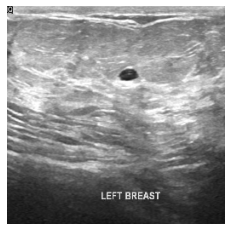

In [ ]:
show_image(load_image(image_paths[0], SIZE))

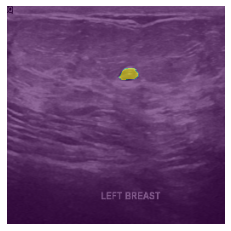

In [ ]:
show_mask(load_image(image_paths[0], SIZE), load_image(mask_paths[0], SIZE)[:,:,0], alpha=0.6)

## **Approach**

Below here I have explained my strategy to tackel the multiple mask Images.

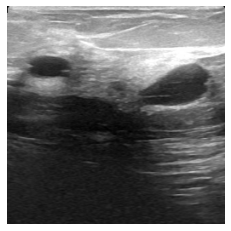

In [ ]:
show_image(load_image('../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (100).png', SIZE))

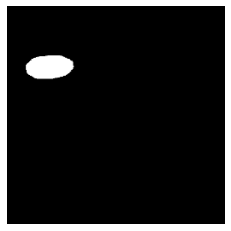

In [ ]:
show_image(load_image('../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png', SIZE))

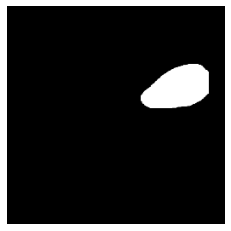

In [ ]:
show_image(load_image('../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (100)_mask.png', SIZE))

## **Data Work**

In [ ]:
images = load_images(image_paths, SIZE)
masks = load_images(mask_paths, SIZE, mask=True)

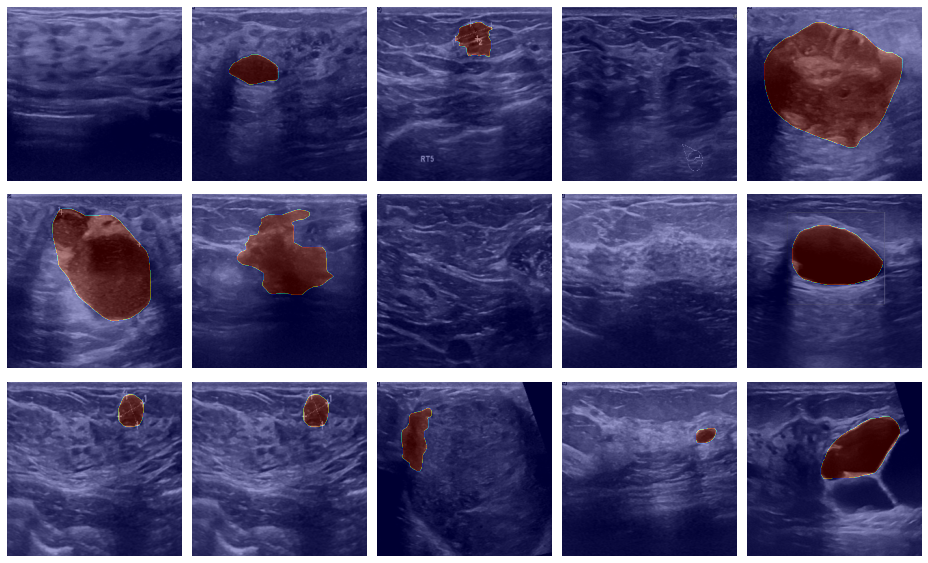

In [ ]:
plt.figure(figsize=(13,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    id = np.random.randint(len(images))
    show_mask(images[id], masks[id], cmap='jet')
plt.tight_layout()
plt.show()

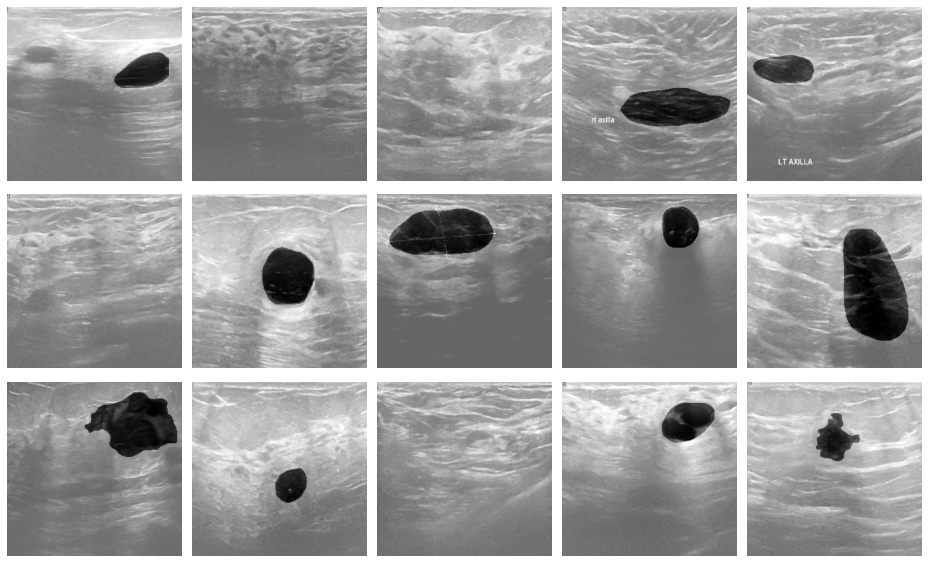

In [ ]:
plt.figure(figsize=(13,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    id = np.random.randint(len(images))
    show_mask(images[id], masks[id], cmap='binary')
plt.tight_layout()
plt.show()

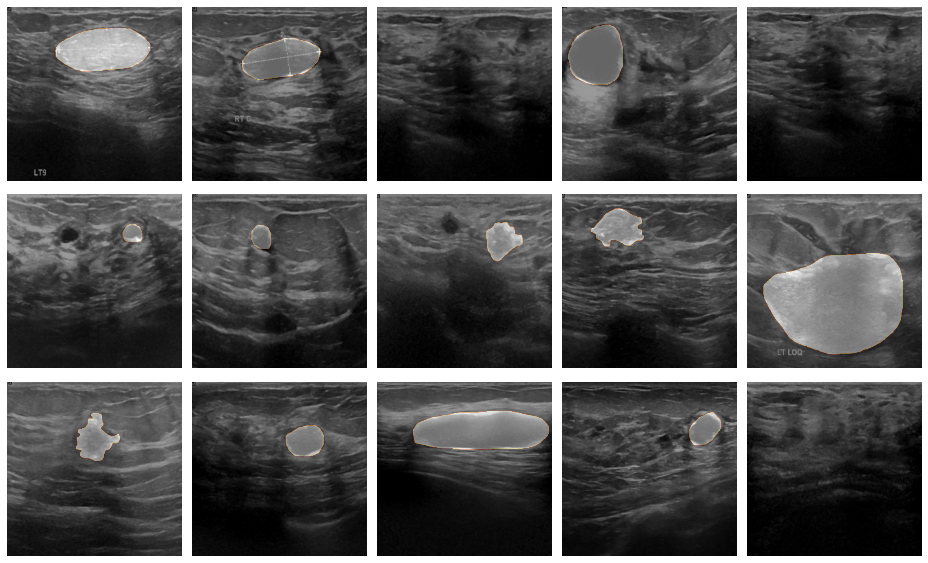

In [ ]:
plt.figure(figsize=(13,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    id = np.random.randint(len(images))
    show_mask(images[id], masks[id], cmap='afmhot')
plt.tight_layout()
plt.show()

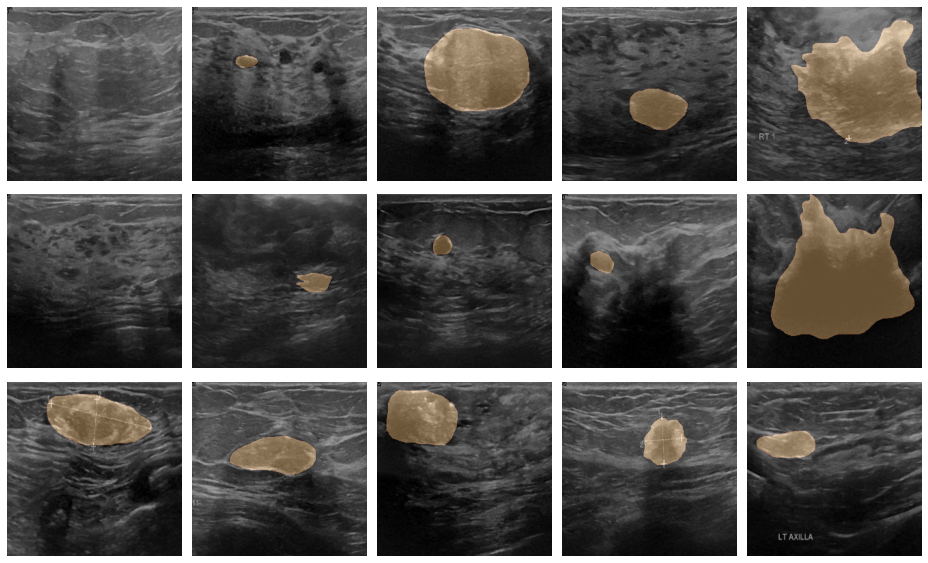

In [ ]:
plt.figure(figsize=(13,8))
for i in range(15):
    plt.subplot(3,5,i+1)
    id = np.random.randint(len(images))
    show_mask(images[id], masks[id], cmap='copper')
plt.tight_layout()
plt.show()

# **Encoder**

In [ ]:
class EncoderBlock(Layer):

    def __init__(self, filters, rate, pooling=True, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)

        self.filters = filters
        self.rate = rate
        self.pooling = pooling

        self.c1 = Conv2D(filters, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')
        self.drop = Dropout(rate)
        self.c2 = Conv2D(filters, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')
        self.pool = MaxPool2D()

    def call(self, X):
        x = self.c1(X)
        x = self.drop(x)
        x = self.c2(x)
        if self.pooling:
            y = self.pool(x)
            return y, x
        else:
            return x

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters":self.filters,
            'rate':self.rate,
            'pooling':self.pooling
        }

# **Decoder**

In [ ]:
class DecoderBlock(Layer):

    def __init__(self, filters, rate, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)

        self.filters = filters
        self.rate = rate

        self.up = UpSampling2D()
        self.net = EncoderBlock(filters, rate, pooling=False)

    def call(self, X):
        X, skip_X = X
        x = self.up(X)
        c_ = concatenate([x, skip_X])
        x = self.net(c_)
        return x

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters":self.filters,
            'rate':self.rate,
        }

# **Attention Gate**

In [ ]:
class AttentionGate(Layer):

    def __init__(self, filters, bn, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.bn = bn

        self.normal = Conv2D(filters, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer='he_normal')
        self.learn = Conv2D(1, kernel_size=1, padding='same', activation='sigmoid')
        self.resample = UpSampling2D()
        self.BN = BatchNormalization()

    def call(self, X):
        X, skip_X = X

        x = self.normal(X)
        skip = self.down(skip_X)
        x = Add()([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = Multiply()([x, skip_X])
        if self.bn:
            return self.BN(f)
        else:
            return f
        # return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "filters":self.filters,
            "bn":self.bn
        }

# **Custom Callback**

In [ ]:
class ShowProgress(Callback):
    def on_epoch_end(self, epochs, logs=None):
        id = np.random.randint(200)
        exp = GradCAM()
        image = images[id]
        mask = masks[id]
        pred_mask = self.model.predict(image[np.newaxis,...])
        cam = exp.explain(
            validation_data=(image[np.newaxis,...], mask),
            class_index=1,
            layer_name='Attention4',
            model=self.model
        )

        plt.figure(figsize=(10,5))

        plt.subplot(1,3,1)
        plt.title("Original Mask")
        show_mask(image, mask, cmap='copper')

        plt.subplot(1,3,2)
        plt.title("Predicted Mask")
        show_mask(image, pred_mask, cmap='copper')

        plt.subplot(1,3,3)
        show_image(cam,title="GradCAM")

        plt.tight_layout()
        plt.show()

# **Attention UNet**

In [ ]:
# Inputs
input_layer = Input(shape=images.shape[-3:])

# Encoder
p1, c1 = EncoderBlock(32,0.1, name="Encoder1")(input_layer)
p2, c2 = EncoderBlock(64,0.1, name="Encoder2")(p1)
p3, c3 = EncoderBlock(128,0.2, name="Encoder3")(p2)
p4, c4 = EncoderBlock(256,0.2, name="Encoder4")(p3)

# Encoding
encoding = EncoderBlock(512,0.3, pooling=False, name="Encoding")(p4)

# Attention + Decoder

a1 = AttentionGate(256, bn=True, name="Attention1")([encoding, c4])
d1 = DecoderBlock(256,0.2, name="Decoder1")([encoding, a1])

a2 = AttentionGate(128, bn=True, name="Attention2")([d1, c3])
d2 = DecoderBlock(128,0.2, name="Decoder2")([d1, a2])

a3 = AttentionGate(64, bn=True, name="Attention3")([d2, c2])
d3 = DecoderBlock(64,0.1, name="Decoder3")([d2, a3])


a4 = AttentionGate(32, bn=True, name="Attention4")([d3, c1])
d4 = DecoderBlock(32,0.1, name="Decoder4")([d3, a4])

# Output
output_layer = Conv2D(1, kernel_size=1, activation='sigmoid', padding='same')(d4)

# Model
model = Model(
    inputs=[input_layer],
    outputs=[output_layer]
)

# Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', MeanIoU(num_classes=2, name='IoU')]
)

# Callbacks
cb = [
    # EarlyStopping(patience=3, restore_best_weight=True), # With Segmentation I trust on eyes rather than on metrics
    ModelCheckpoint("AttentionCustomUNet.h5", save_best_only=True),
    ShowProgress()
]

# **Training**

Epoch 1/20
97/97 [==============================] - 16s 141ms/step - loss: 0.5219 - accuracy: 0.9061 - IoU: 0.4553 - val_loss: 0.3159 - val_accuracy: 0.9813 - val_IoU: 0.4909


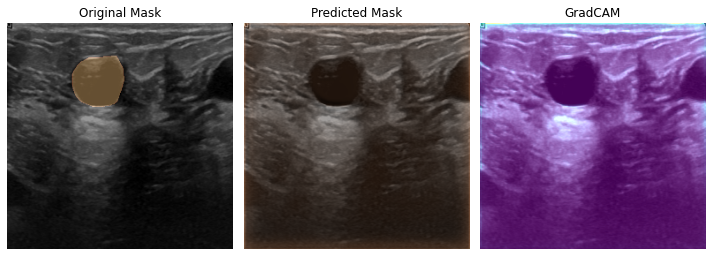

Epoch 2/20
97/97 [==============================] - 13s 131ms/step - loss: 0.2235 - accuracy: 0.9121 - IoU: 0.4557 - val_loss: 0.2038 - val_accuracy: 0.9813 - val_IoU: 0.4909


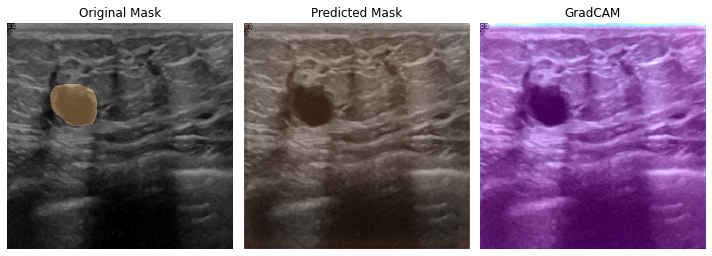

Epoch 3/20
97/97 [==============================] - 13s 131ms/step - loss: 0.2250 - accuracy: 0.9136 - IoU: 0.4529 - val_loss: 0.3352 - val_accuracy: 0.9813 - val_IoU: 0.4909


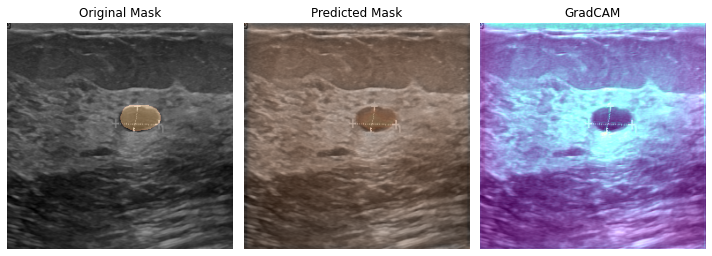

Epoch 4/20
97/97 [==============================] - 13s 131ms/step - loss: 0.2052 - accuracy: 0.9232 - IoU: 0.4549 - val_loss: 0.2100 - val_accuracy: 0.9814 - val_IoU: 0.4909


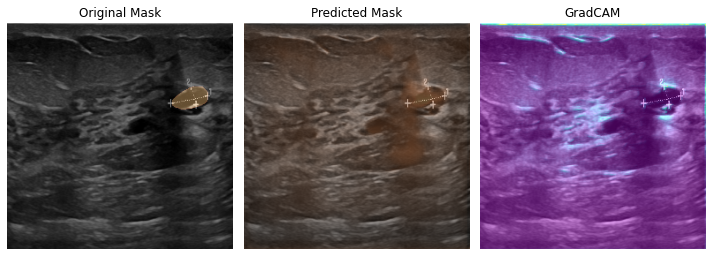

Epoch 5/20
97/97 [==============================] - 13s 131ms/step - loss: 0.2002 - accuracy: 0.9248 - IoU: 0.4552 - val_loss: 0.1425 - val_accuracy: 0.9814 - val_IoU: 0.4909


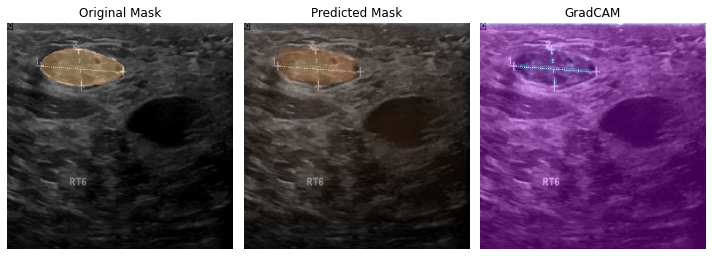

Epoch 6/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1927 - accuracy: 0.9273 - IoU: 0.4548 - val_loss: 0.1092 - val_accuracy: 0.9815 - val_IoU: 0.4909


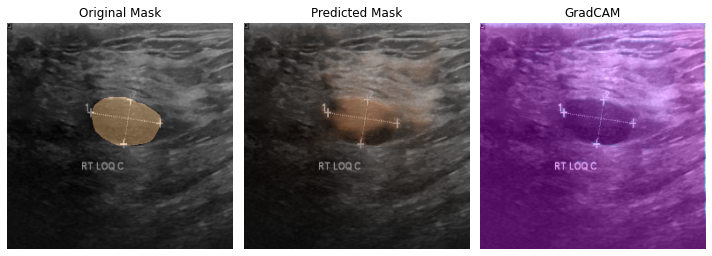

Epoch 7/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1991 - accuracy: 0.9249 - IoU: 0.4532 - val_loss: 0.1881 - val_accuracy: 0.9410 - val_IoU: 0.4909


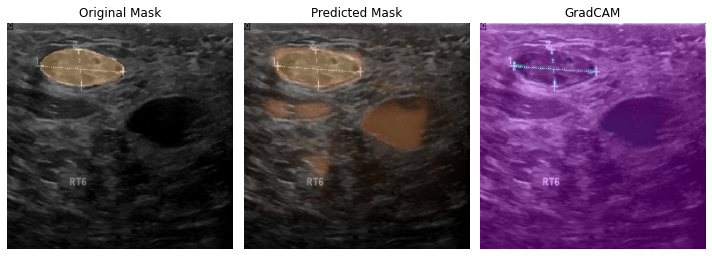

Epoch 8/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1866 - accuracy: 0.9315 - IoU: 0.4574 - val_loss: 0.0687 - val_accuracy: 0.9831 - val_IoU: 0.4917


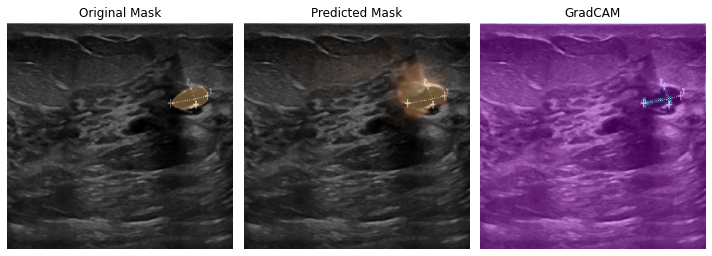

Epoch 9/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1777 - accuracy: 0.9346 - IoU: 0.4563 - val_loss: 0.0599 - val_accuracy: 0.9850 - val_IoU: 0.4909


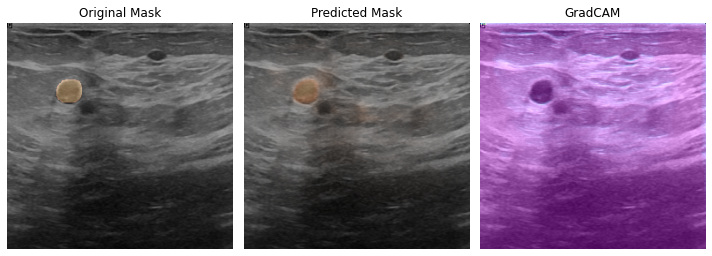

Epoch 10/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1797 - accuracy: 0.9322 - IoU: 0.4529 - val_loss: 0.1302 - val_accuracy: 0.9506 - val_IoU: 0.4909


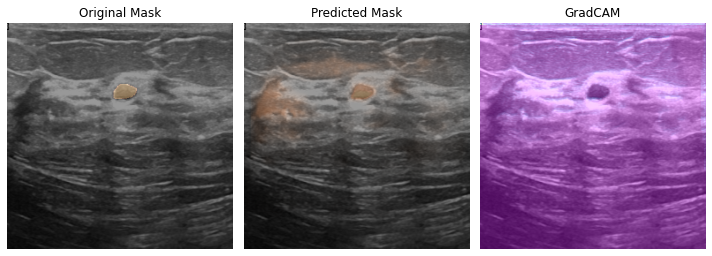

Epoch 11/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1609 - accuracy: 0.9399 - IoU: 0.4596 - val_loss: 0.1175 - val_accuracy: 0.9625 - val_IoU: 0.4909


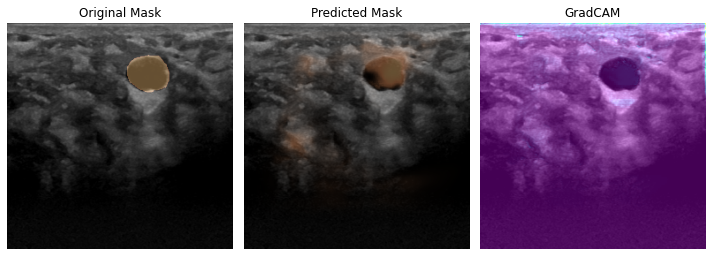

Epoch 12/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1864 - accuracy: 0.9316 - IoU: 0.4544 - val_loss: 0.1150 - val_accuracy: 0.9781 - val_IoU: 0.4909


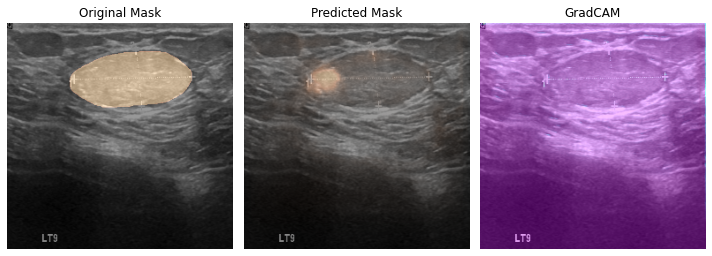

Epoch 13/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1576 - accuracy: 0.9414 - IoU: 0.4574 - val_loss: 0.0635 - val_accuracy: 0.9829 - val_IoU: 0.4909


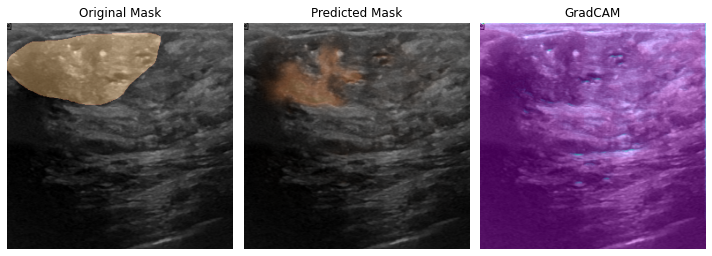

Epoch 14/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1532 - accuracy: 0.9420 - IoU: 0.4544 - val_loss: 0.0579 - val_accuracy: 0.9841 - val_IoU: 0.4909


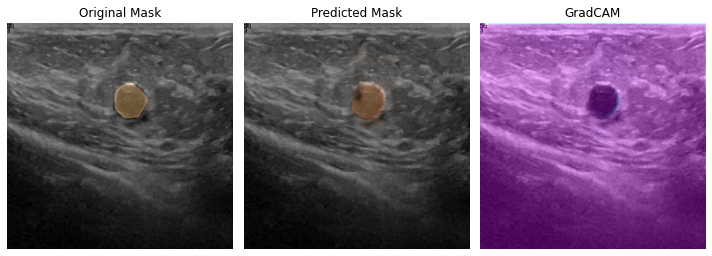

Epoch 15/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1513 - accuracy: 0.9440 - IoU: 0.4580 - val_loss: 0.0797 - val_accuracy: 0.9817 - val_IoU: 0.4909


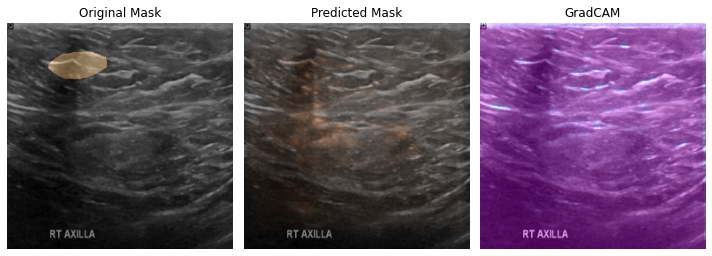

Epoch 16/20
97/97 [==============================] - 13s 131ms/step - loss: 0.1496 - accuracy: 0.9452 - IoU: 0.4571 - val_loss: 0.0633 - val_accuracy: 0.9851 - val_IoU: 0.4909


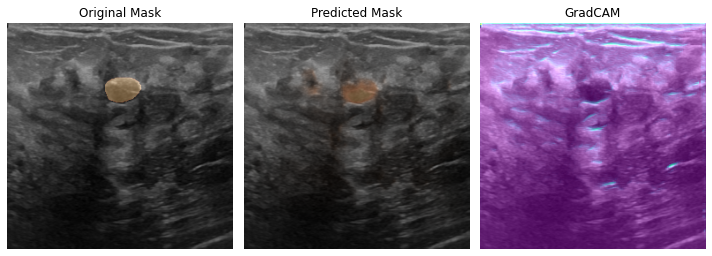

Epoch 17/20
97/97 [==============================] - 2s 16ms/step - loss: 0.1430 - accuracy: 0.9497 - IoU: 0.4572 - val_loss: 0.0692 - val_accuracy: 0.9817 - val_IoU: 0.4909


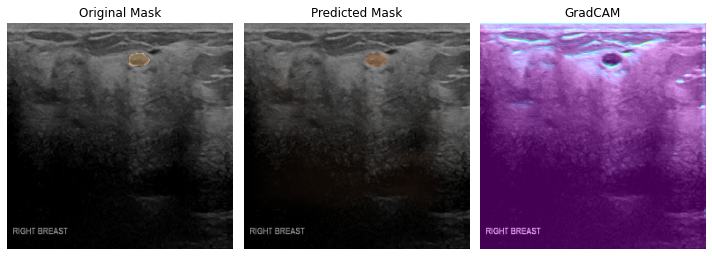

In [ ]:
# Config Training
BATCH_SIZE = 8
SPE = len(images)//BATCH_SIZE

# Training
results = model.fit(
    images, masks,
    validation_split=0.2,
    epochs=20,
    steps_per_epoch=SPE,
    batch_size=BATCH_SIZE,
    callbacks=cb
)

# **Evaluation**

In [ ]:
loss, accuracy, iou, val_loss, val_accuracy, val_iou = results.history.values()

In [ ]:
import shutil

# Specify the path to the file
file_path = '/kaggle/input/breast-cancer-detection-unet/BreastCancerAttentionUNet.h5'
destination_path = '/kaggle/working/BreastCancerAttentionUNet.h5'

# Copy the file to the working directory
shutil.copyfile(file_path, destination_path)

print(f"File has been copied to {destination_path}")


File has been copied to /kaggle/working/BreastCancerAttentionUNet.h5


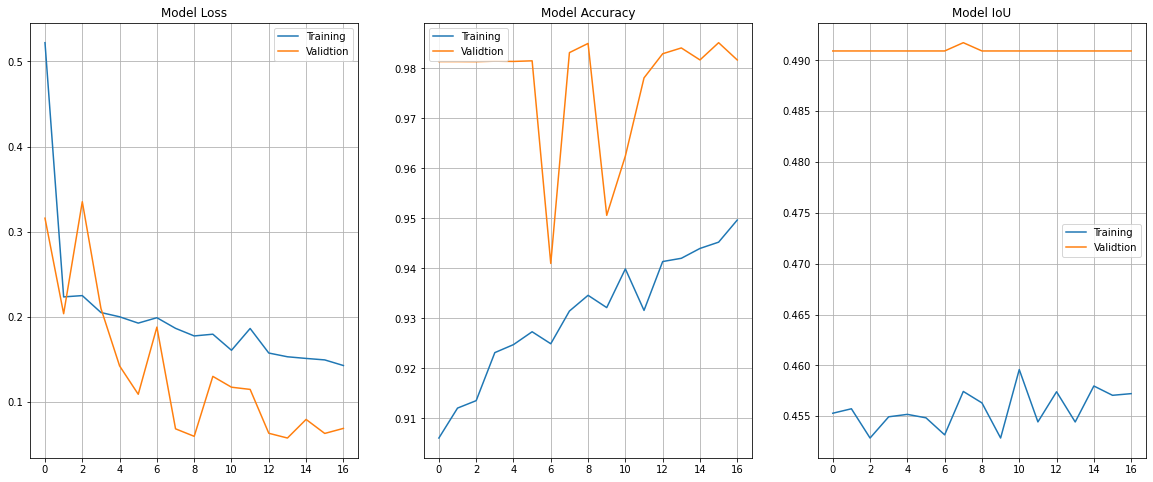

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title("Model Loss")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validtion")
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.title("Model Accuracy")
plt.plot(accuracy, label="Training")
plt.plot(val_accuracy, label="Validtion")
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.title("Model IoU")
plt.plot(iou, label="Training")
plt.plot(val_iou, label="Validtion")
plt.legend()
plt.grid()

plt.show()

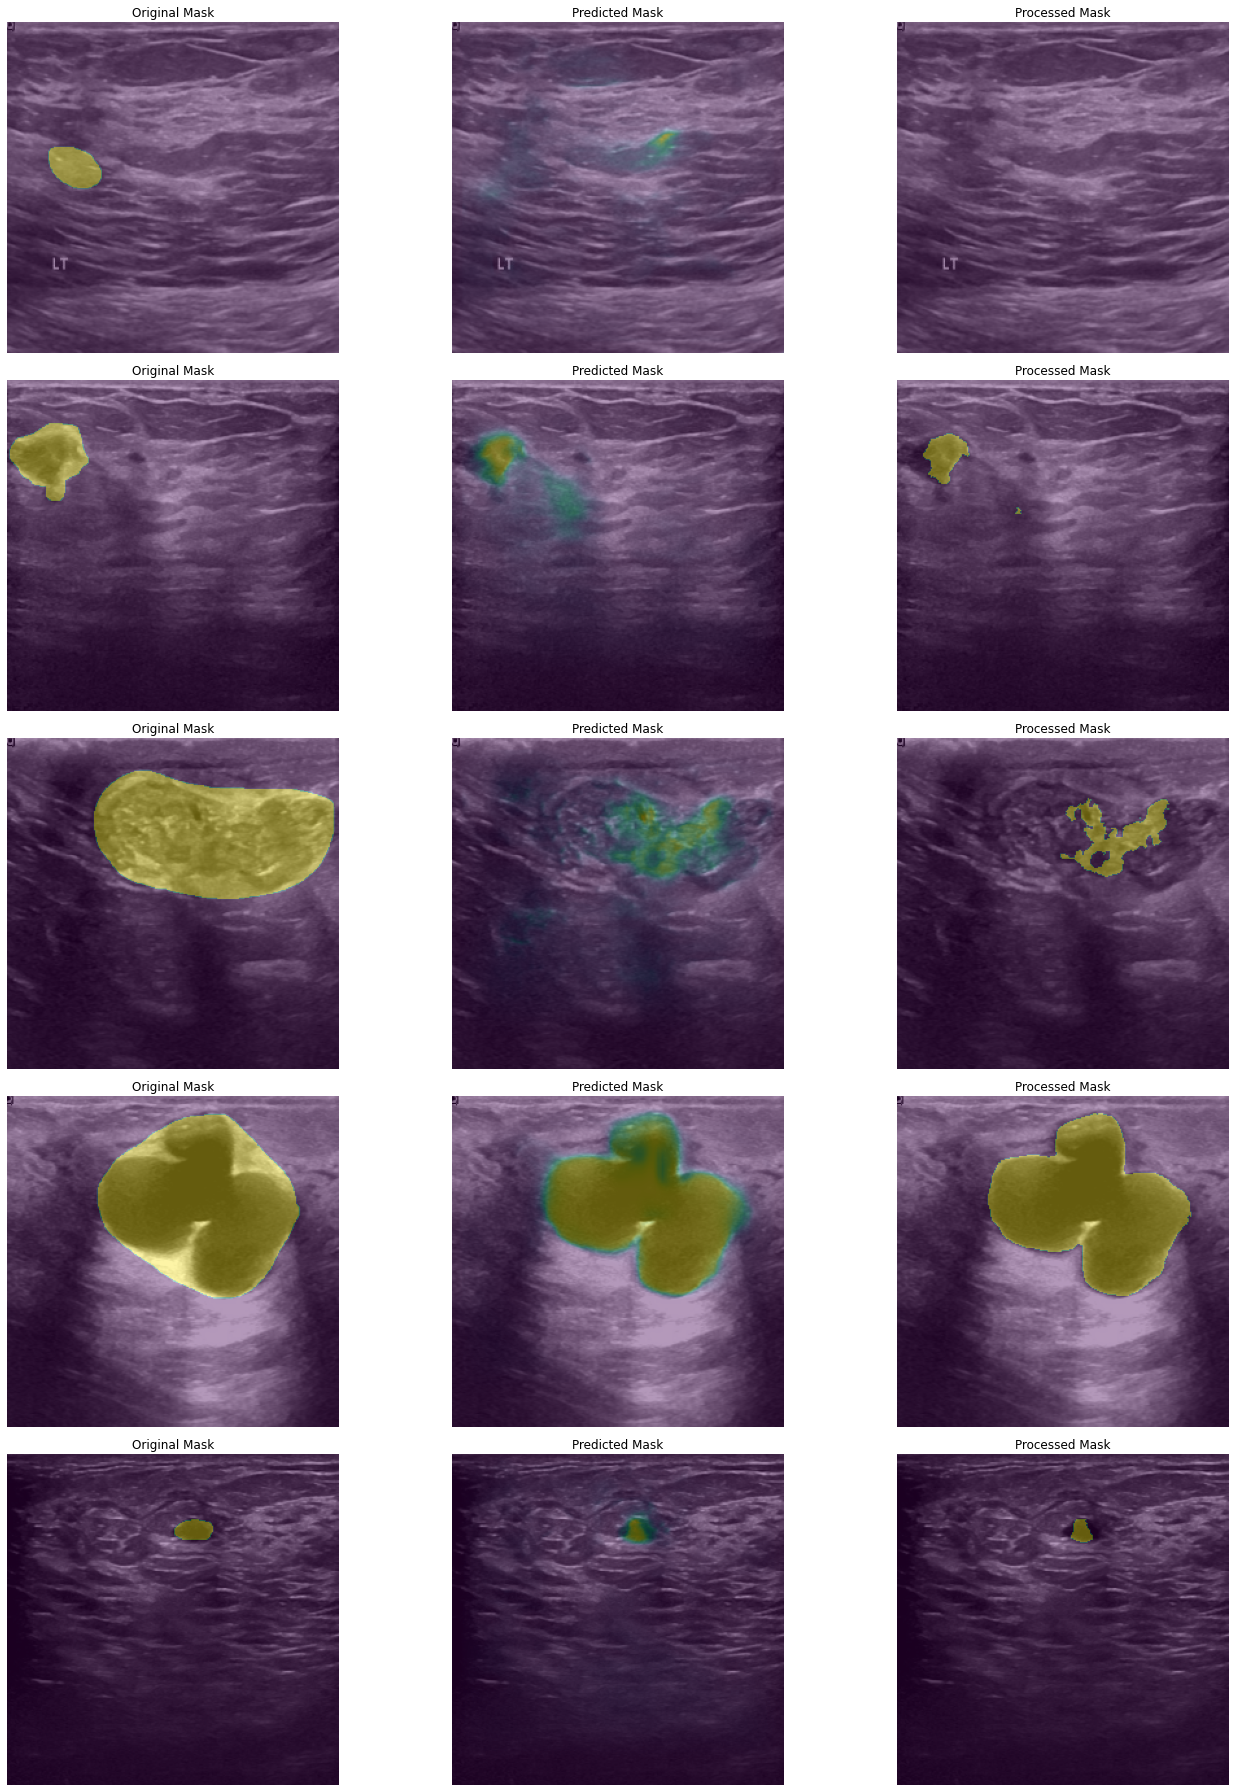

In [ ]:
plt.figure(figsize=(20,25))
n=0
for i in range(1,(5*3)+1):
    plt.subplot(5,3,i)
    if n==0:
        id = np.random.randint(len(images))
        image = images[id]
        mask = masks[id]
        pred_mask = model.predict(image[np.newaxis,...])

        plt.title("Original Mask")
        show_mask(image, mask)
        n+=1
    elif n==1:
        plt.title("Predicted Mask")
        show_mask(image, pred_mask)
        n+=1
    elif n==2:
        pred_mask = (pred_mask>0.5).astype('float')
        plt.title("Processed Mask")
        show_mask(image, pred_mask)
        n=0
plt.tight_layout()
plt.show()